In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170500096/170498071 [==============================] - 2s 0us/step


In [4]:
print('Train: X=%s, y=%s' % (train_images.shape,train_labels.shape))
print('Test: X=%s, y=%s' % (test_images.shape, test_labels.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


In [0]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [8]:
from sklearn.metrics import classification_report , confusion_matrix, multilabel_confusion_matrix

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=50, batch_size=64,
                    validation_data=(test_images, test_labels))
y_pred=model.predict_classes(test_images)
yTest_priginal = np.argmax(test_labels,axis=1)
print(classification_report(test_labels,y_pred))
print(confusion_matrix(y_true=test_labels,y_pred=y_pred))
print(multilabel_confusion_matrix(y_true=test_labels,y_pred=y_pred))
model.save('final_model.h5')

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 245us/sample - loss: 1.5838 - acc: 0.4189 - val_loss: 1.3262 - val_acc: 0.5207
Epoch 2/50
50000/50000 [==============================] - 8s 161us/sample - loss: 1.2283 - acc: 0.5635 - val_loss: 1.1051 - val_acc: 0.6128
Epoch 3/50
50000/50000 [==============================] - 8s 167us/sample - loss: 1.0511 - acc: 0.6299 - val_loss: 1.0735 - val_acc: 0.6230
Epoch 4/50
50000/50000 [==============================] - 9s 174us/sample - loss: 0.9420 - acc: 0.6686 - val_loss: 0.9351 - val_acc: 0.6767
Epoch 5/50
50000/50000 [==============================] - 9s 176us/sample - loss: 0.8660 - acc: 0.6961 - val_loss: 0.8926 - val_acc: 0.6896
Epoch 6/50
50000/50000 [==============================] - 9s 177us/sample - loss: 0.8036 - acc: 0.7189 - val_loss: 0.9157 - val_acc: 0.6850
Epoch 7/50
50000/50000 [==============================] - 9s 176us/sample - loss: 0.7592 - acc: 0.7343 - val_

10000/10000 - 1s - loss: 2.3730 - acc: 0.6875


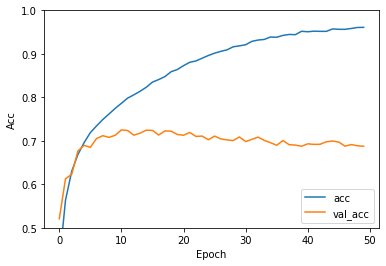

In [9]:
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label = 'val_acc')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [0]:
print(test_acc)

0.6893
